# SUPERVISED MACHINE LEARNING:
# ANÁLISE DE REGRESSÃO SIMPLES E MÚLTIPLA

UNIVERSIDADE DE SÃO PAULO

MBA DATA SCIENCE & ANALYTICS

Prof. Dr. Luiz Paulo Fávero

coding: utf-8

In [41]:
# Instalação dos pacotes.

# !pip install pandas
# !pip install numpy
# !pip install -U seaborn
# !pip install matplotlib
# !pip install plotly
# !pip install scipy
# !pip install statsmodels
# !pip install scikit-learn
# !pip install pingouin
# !pip install emojis
# !pip install statstests
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 722.5 kB/s eta 0:00:0000:0100:01


In [3]:
# Importação dos pacotes.

import pandas as pd # manipulação de dados em formato de dataframe.
import numpy as np # operações matemáticas.
import seaborn as sns # visualização gráfica.
import matplotlib.pyplot as plt # visualização gráfica.
import plotly.graph_objects as go # gráficos 3D.
from scipy.stats import pearsonr # correlações de Pearson.
import statsmodels.api as sm # estimação de modelos.
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos.
from sklearn.preprocessing import LabelEncoder # transformação de dados.
import pingouin as pg # outro modo para obtenção de matrizes de correlações.
import emojis # inserção de emojis em gráficos.
from statstests.process import stepwise # procedimento Stepwise.
from statstests.tests import shapiro_francia # teste de Shapiro-Francia.
from scipy.stats import boxcox # transformação de Box-Cox.
from scipy.stats import norm # para plotagem da curva normal.
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'.
import urllib.request
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

## REGRESSÃO LINEAR SIMPLES

In [4]:
# Carregamento da base de dados.

url = 'https://raw.githubusercontent.com/filipecarbonera/MBA_USP_Data_Science_Analytics/main/An%C3%A1lise%20de%20Regress%C3%A3o%20Simples%20e%20M%C3%BAltipla/tempodist.csv'

df_tempodist = pd.read_csv(url, delimiter=',')
df_tempodist

,tempo,distancia
0,15,8
1,20,6
2,20,15
3,40,20
4,50,25
5,25,11
6,10,5
7,55,32
8,35,28
9,30,20


In [5]:
# Características das variáveis do dataset.
df_tempodist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tempo      10 non-null     int64
 1   distancia  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [6]:
# Estatísticas univariadas.
df_tempodist.describe()

,tempo,distancia
count,10.00000,10.000000
mean,30.00000,17.000000
std,14.90712,9.510228
min,10.00000,5.000000
25%,20.00000,8.750000
50%,27.50000,17.500000
75%,38.75000,23.750000
max,55.00000,32.000000


<function matplotlib.pyplot.show(close=None, block=None)>

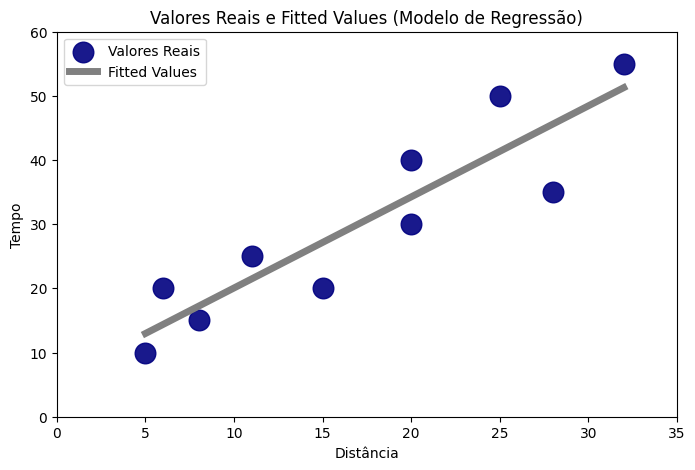

In [7]:
#  Gráfico de dispersão com o ajuste linear (fitted values de um modelo de regressão) que se adequa às observações.

plt.figure(figsize=(8,5))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=False,
            scatter_kws={"color":'navy', 'alpha':0.9, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Valores Reais e Fitted Values (Modelo de Regressão)', fontsize=12)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=10, loc='upper left')
plt.show

In [8]:
# Estimação do modelo de regressão linear simples.
modelo = sm.OLS.from_formula('tempo ~ distancia', df_tempodist).fit()

# Observação dos parâmetros resultantes da estimação.
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           0.000314
Time:                        22:21:51   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.231      -4.573      16.330
distancia      1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Salvando fitted values (variável yhat) e residuals (variável erro).
#no dataset

df_tempodist['yhat'] = modelo.fittedvalues
df_tempodist['erro'] = modelo.resid
df_tempodist

,tempo,distancia,yhat,erro
0,15,8,17.229730,-2.229730
1,20,6,14.391892,5.608108
2,20,15,27.162162,-7.162162
3,40,20,34.256757,5.743243
4,50,25,41.351351,8.648649
5,25,11,21.486486,3.513514
6,10,5,12.972973,-2.972973
7,55,32,51.283784,3.716216
8,35,28,45.608108,-10.608108
9,30,20,34.256757,-4.256757


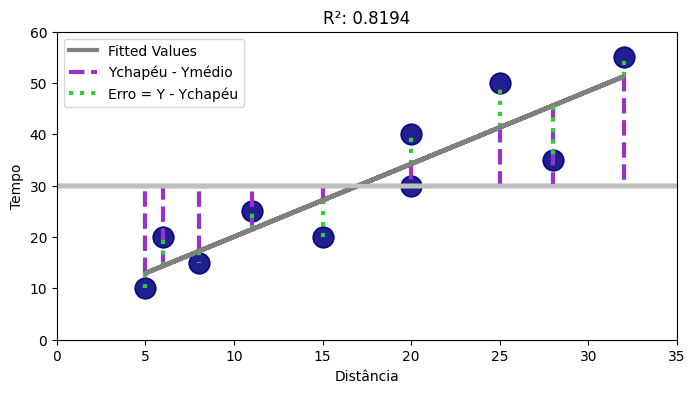

In [10]:
# Gráfico didático para visualizar o conceito de R².

plt.figure(figsize=(8,4))
y = df_tempodist['tempo']
yhat = df_tempodist['yhat']
x = df_tempodist['distancia']
mean = np.full(x.shape[0] , y.mean(), dtype=int)

for i in range(len(x)-1):
    plt.plot(x, yhat, color='grey', linewidth=3)
    plt.plot([x[i], x[i]], [yhat[i], mean[i]], '--', color='darkorchid', linewidth=3)
    plt.plot([x[i], x[i]], [yhat[i], y[i]],':', color='limegreen', linewidth=3)
    plt.scatter(x, y, color='navy', s=220, alpha=0.2)
    plt.axhline(y = y.mean(), color = 'silver', linestyle = '-', linewidth=3)
    plt.title('R²: ' + str(round(modelo.rsquared, 4)), fontsize=12)
    plt.xlabel('Distância', fontsize=10)
    plt.ylabel('Tempo', fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(0, 35)
    plt.ylim(0, 60)
    plt.legend(['Fitted Values', 'Ychapéu - Ymédio', 'Erro = Y - Ychapéu'],
               fontsize=10, loc='upper left')
plt.show()

In [11]:
# Cálculo manual do R².

R2 = ((df_tempodist['yhat']-
       df_tempodist['tempo'].mean())**2).sum()/(((df_tempodist['yhat']-
       df_tempodist['tempo'].mean())**2).sum()+
       (df_tempodist['erro']**2).sum())

round(R2,4)

0.8194

### Coeficiente de ajuste (R²) é a correlação ao quadrado.

In [12]:
# Correlação de Pearson.
df_tempodist[['tempo','distancia']].corr()

,tempo,distancia
tempo,1.000000,0.905221
distancia,0.905221,1.000000


In [13]:
# R².
(df_tempodist[['tempo','distancia']].corr())**2

,tempo,distancia
tempo,1.000000,0.819426
distancia,0.819426,1.000000


In [14]:
# R² de maneira direta.
modelo.rsquared

0.8194256756756757

                            OLS Regression Results                            
Dep. Variable:                   yhat   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.598e+31
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.72e-122
Time:                        22:21:53   Log-Likelihood:                 309.16
No. Observations:                  10   AIC:                            -614.3
Df Residuals:                       8   BIC:                            -613.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784   6.83e-15   8.61e+14      0.0

<function matplotlib.pyplot.show(close=None, block=None)>

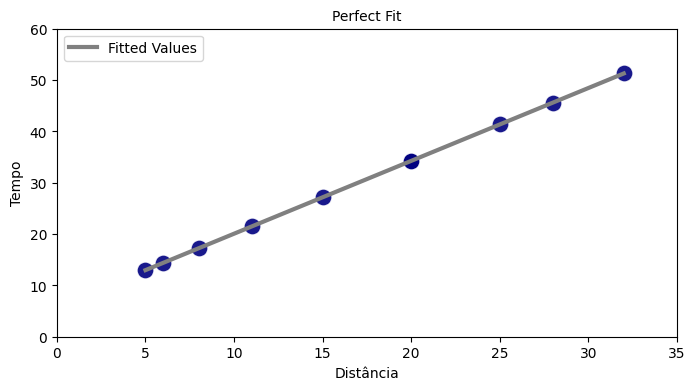

In [15]:
# Modelo auxiliar para mostrar R² igual a 100% (para fins didáticos).

# Estimação do modelo com yhat como variável dependente resultará em um modelo com R² igual a 100%.
modelo_auxiliar = sm.OLS.from_formula('yhat ~ distancia', df_tempodist).fit()

# Parâmetros resultantes da estimação deste modelo didático.
print(modelo_auxiliar.summary())

# Gráfico mostrando o perfect fit.

plt.figure(figsize=(8,4))
sns.scatterplot(data=df_tempodist, x='distancia', y='yhat',
                color='navy', alpha=0.9, s=150)
sns.regplot(data=df_tempodist, x='distancia', y='yhat', ci=False, scatter=False,
            label='Fitted Values',
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('Perfect Fit', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(loc='upper left', fontsize=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

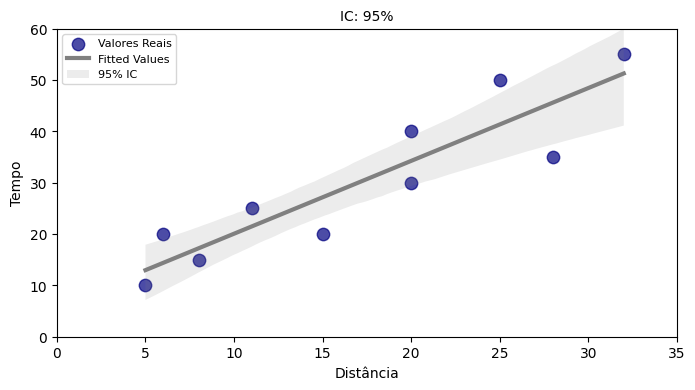

In [16]:
# Gráfico com intervalo de confiança de 95%.

plt.figure(figsize=(8,4))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=95,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':80},
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('IC: 95%', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '95% IC'], fontsize=8, loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

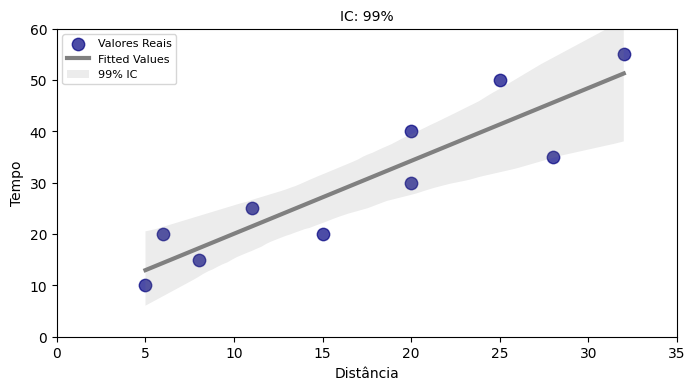

In [17]:
# Gráfico com intervalo de confiança de 99%.

plt.figure(figsize=(8,4))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=99,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':80},
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('IC: 99%', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '99% IC'],
           fontsize=8, loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

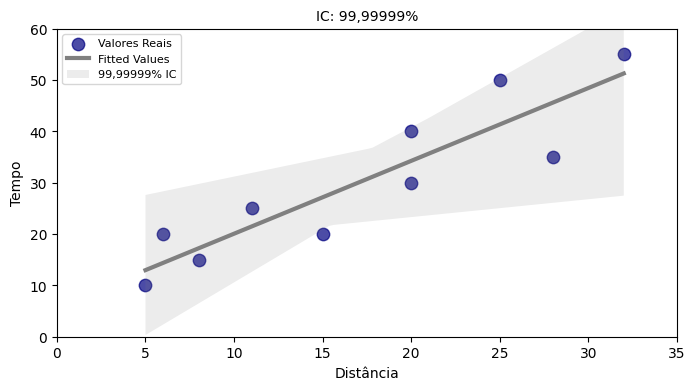

In [18]:
# Gráfico com intervalo de confiança de 99,99999%.

plt.figure(figsize=(8,4))
sns.regplot(data=df_tempodist, x='distancia', y='tempo', marker='o', ci=99.99999,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':80},
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('IC: 99,99999%', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '99,99999% IC'],
           fontsize=8, loc='upper left')
plt.show

In [19]:
# Calculando os intervalos de confiança.

# Nível de significância de 10% / Nível de confiança de 90%.
print(modelo.conf_int(alpha=0.1),"\n")

# Nível de significância de 5% / Nível de confiança de 95%.
print(modelo.conf_int(alpha=0.05),"\n")

# Nível de significância de 1% / Nível de confiança de 99%.
print(modelo.conf_int(alpha=0.01),"\n")

# Nível de significância de 0,00001% / Nível de confiança de 99,99999%.
print(modelo.conf_int(alpha=0.0000001))

                  0          1
Intercept -2.549702  14.306459
distancia  0.981001   1.856837 

                  0          1
Intercept -4.573188  16.329944
distancia  0.875861   1.961977 

                  0          1
Intercept -9.329336  21.086093
distancia  0.628735   2.209103 

                   0          1
Intercept -74.960201  86.716957
distancia  -2.781409   5.619247


In [20]:
# Fazendo predições em modelos OLS.

# Ex.: Qual seria o tempo gasto, em média, para percorrer a distância de 25km?
# Cálculo manual
print(5.8784 + 1.4189*(25))

# Cálculo utilizando os próprios parâmetros estimados do modelo.
print(round(modelo.params[0] + modelo.params[1]*(25),4))

41.3509
41.3514


In [21]:
# Maneira direta utilizando a função 'DataFrame' do pacote 'pandas' dentro da função 'predict'.
modelo.predict(pd.DataFrame({'distancia':[25]}))

0    41.351351
dtype: float64

In [22]:
# Nova modelagem para o mesmo exemplo, com novo dataset que contém replicações.

# Quantas replicações de cada linha você quer? -> função 'repeat' do 'numpy'
df_replicado = pd.DataFrame(np.repeat(df_tempodist.values, 3, axis=0))
df_replicado.columns = df_tempodist.columns
df_replicado

,tempo,distancia,yhat,erro
0,15.0,8.0,17.229730,-2.229730
1,15.0,8.0,17.229730,-2.229730
2,15.0,8.0,17.229730,-2.229730
3,20.0,6.0,14.391892,5.608108
4,20.0,6.0,14.391892,5.608108
5,20.0,6.0,14.391892,5.608108
6,20.0,15.0,27.162162,-7.162162
7,20.0,15.0,27.162162,-7.162162
8,20.0,15.0,27.162162,-7.162162
9,40.0,20.0,34.256757,5.743243


In [23]:
# Estimação do modelo com valores replicados.
modelo_replicado = sm.OLS.from_formula('tempo ~ distancia', df_replicado).fit()

# Parâmetros do 'modelo_replicado'.
modelo_replicado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     127.1
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           6.42e-12
Time:                        22:21:56   Log-Likelihood:                -96.369
No. Observations:                  30   AIC:                             196.7
Df Residuals:                      28   BIC:                             199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      2.423      2.426      0.022       0.916      10.841
distancia      1.4189      0.126     11.272      0.000       1.161       1.677
==============================================================================
Omnibus:                        5.437   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                2.082
Skew:                          -0.262   Prob(JB):                        0.353
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Calculando os novos intervalos de confiança.

# Nível de significância de 5% / Nível de confiança de 95%.
modelo_replicado.conf_int(alpha=0.05)

,0,1
Intercept,0.915844,10.840913
distancia,1.161068,1.676769


<function matplotlib.pyplot.show(close=None, block=None)>

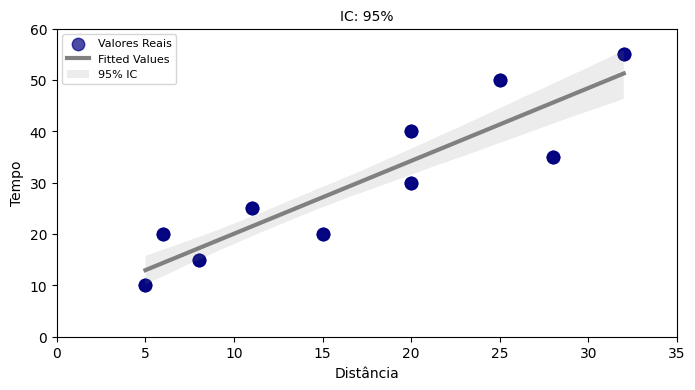

In [25]:
# Plotando o novo gráfico com intervalo de confiança de 95%.
# Note o estreitamento da amplitude dos intervalos de confiança!

plt.figure(figsize=(8,4))
sns.regplot(data=df_replicado, x='distancia', y='tempo', marker='o', ci=95,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':80},
            line_kws={"color":'grey', 'linewidth': 3})
plt.title('IC: 95%', fontsize=10)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Tempo', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Reais', 'Fitted Values', '95% IC'], fontsize=8, loc='upper left')
plt.show

In [26]:
# PROCEDIMENTO ERRADO: ELIMINAR O INTERCEPTO QUANDO ESTE NÃO SE MOSTRAR ESTATISTICAMENTE SIGNIFICANTE.

modelo_errado = sm.OLS.from_formula('tempo ~ 0 + distancia', df_tempodist).fit()

# Parâmetros do 'modelo_errado'.
print(modelo_errado.summary())

# Comparando os parâmetros do modelo inicial (objeto 'modelo') com o 'modelo_errado' pela função 'summary_col' do pacote 'statsmodels.iolib.summary2'.
summary_col([modelo, modelo_errado])

# Outro modo mais completo também pela função 'summary_col'.
summary_col([modelo, modelo_errado],
            model_names=["MODELO INICIAL","MODELO ERRADO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

                                 OLS Regression Results                                
Dep. Variable:                  tempo   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              217.5
Date:                Tue, 30 Jul 2024   Prob (F-statistic):                    1.31e-07
Time:                        22:21:57   Log-Likelihood:                         -33.077
No. Observations:                  10   AIC:                                      68.15
Df Residuals:                       9   BIC:                                      68.46
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,MODELO INICIAL,MODELO ERRADO
Intercept,5.8784,
,(4.5323),
distancia,1.4189***,1.6887***
,(0.2355),(0.1145)
R-squared,0.8194,0.9603
R-squared Adj.,0.7969,0.9558
N,10,10


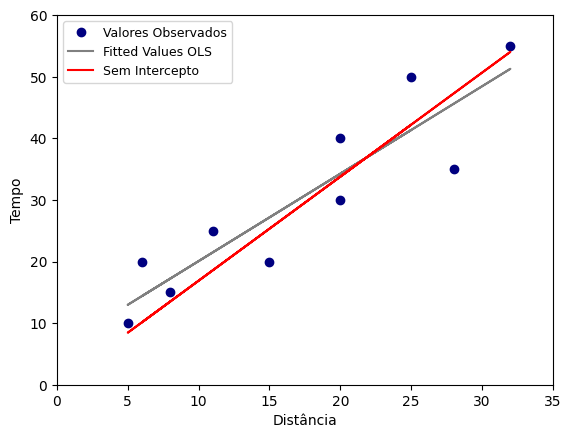

In [27]:
# Gráfico didático para visualizar o viés decorrente de se eliminar erroneamente o intercepto em modelos regressivos.

x = df_tempodist['distancia']
y = df_tempodist['tempo']

yhat = df_tempodist['yhat']
yhat_errado = modelo_errado.fittedvalues

plt.plot(x, y, 'o', color='navy')
plt.plot(x, yhat, color='gray')
plt.plot(x, yhat_errado, color='red')
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Observados','Fitted Values OLS',
            'Sem Intercepto'], fontsize=9)
plt.show()

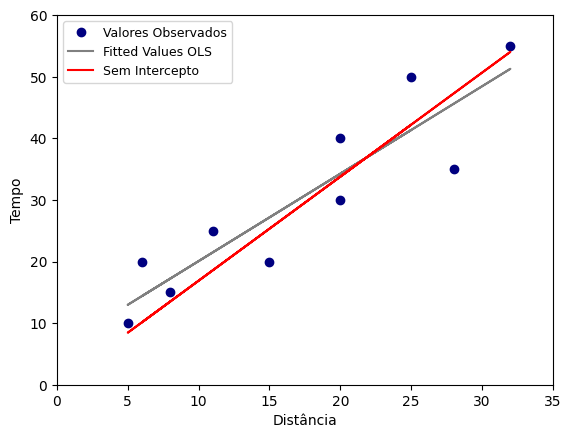

In [28]:
# DÚVIDA: Qual estimação devo escolher?

# Construção do gráfico.
x = df_tempodist['distancia']
y = df_tempodist['tempo']

yhat = df_tempodist['yhat']
yhat_errado = modelo_errado.fittedvalues

plt.plot(x, y, 'o', color='navy')
plt.plot(x, yhat, color='gray')
plt.plot(x, yhat_errado, color='red')
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Observados','Fitted Values OLS', 'Sem Intercepto'], fontsize=9)

plt.show()

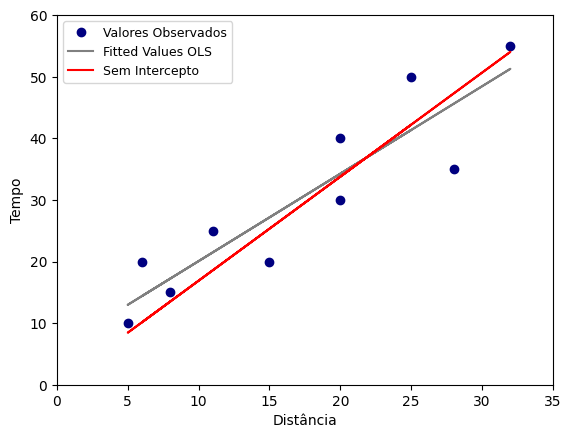

In [29]:
# In[1.25]: DECISÃO: DEVO ESCOLHER O MODELO COM INTERCEPTO!

# Construção do gráfico.
x = df_tempodist['distancia']
y = df_tempodist['tempo']

yhat = df_tempodist['yhat']
yhat_errado = modelo_errado.fittedvalues

plt.plot(x, y, 'o', color='navy')
plt.plot(x, yhat, color='gray')
plt.plot(x, yhat_errado, color='red')
plt.xlabel("Distância")
plt.ylabel("Tempo")
plt.xlim(0, 35)
plt.ylim(0, 60)
plt.legend(['Valores Observados','Fitted Values OLS', 'Sem Intercepto'], fontsize=9)

plt.show()

## REGRESSÃO LINEAR MULTIPLA

In [30]:
# Carregando a base de dados.

url = 'https://raw.githubusercontent.com/filipecarbonera/MBA_USP_Data_Science_Analytics/main/An%C3%A1lise%20de%20Regress%C3%A3o%20Simples%20e%20M%C3%BAltipla/paises.csv'

df_paises = pd.read_csv(url, delimiter=',', encoding="utf-8")
df_paises

,pais,cpi,idade,horas
0,Argentina,3.9,72,35.0
1,Australia,8.7,64,32.0
2,Austria,7.9,72,32.0
3,Belgium,7.1,67,30.1
4,Brazil,4.0,59,35.0
5,Canada,8.9,61,33.4
6,Chile,6.2,70,34.0
7,China,2.5,49,34.0
8,Colombia,4.0,79,33.0
9,Cyprus,6.3,58,32.0


In [31]:
#Características das variáveis do dataset.
df_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pais    50 non-null     object 
 1   cpi     50 non-null     float64
 2   idade   50 non-null     int64  
 3   horas   50 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [32]:
#Estatísticas univariadas.
df_paises.describe()

,cpi,idade,horas
count,50.000000,50.000000,50.000000
mean,4.894000,60.480000,32.660000
std,2.678974,10.022913,2.431091
min,0.800000,34.000000,26.800000
25%,2.575000,58.000000,31.400000
50%,3.950000,62.000000,32.600000
75%,7.475000,66.750000,34.400000
max,9.300000,79.000000,38.100000


In [33]:
trace = go.Scatter3d(
    x=df_paises['horas'], 
    y=df_paises['idade'], 
    z=df_paises['cpi'], 
    mode='markers',
    marker={
        'size': 10,
        'color': 'darkorchid',
        'opacity': 0.7,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800,
    plot_bgcolor='white',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        ),
        yaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        ),
        zaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        )
    )
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout(scene=dict(
    xaxis_title='horas',
    yaxis_title='idade',
    zaxis_title='cpi'
))

plot_figure.write_html('EXEMPLO2_scatter3D.html')

# Abre o arquivo HTML no browser
import webbrowser
webbrowser.open('EXEMPLO2_scatter3D.html')

False

In [34]:
# Matriz de correlações.
correlation_matrix = df_paises.iloc[:,1:4].corr()
correlation_matrix

,cpi,idade,horas
cpi,1.000000,0.442838,-0.435724
idade,0.442838,1.000000,-0.191748
horas,-0.435724,-0.191748,1.000000


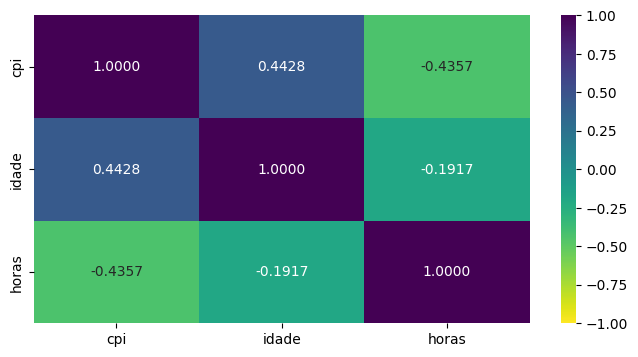

In [39]:
# Mapa de calor com as correlações entre todas as variáveis quantitativas.
plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".4f",
                      cmap=plt.cm.viridis_r,
                      annot_kws={'size': 10}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.show()

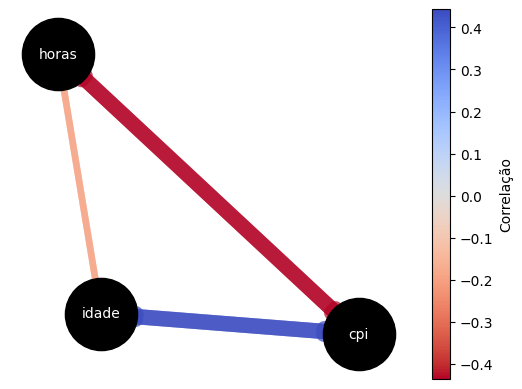

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Criação de um grafo direcionado
G = nx.DiGraph()

# Adição das variáveis como nós do grafo
for variable in correlation_matrix.columns:
    G.add_node(variable)

# Adição das arestas com espessuras proporcionais às correlações
for i, variable1 in enumerate(correlation_matrix.columns):
    for j, variable2 in enumerate(correlation_matrix.columns):
        if i != j:
            correlation = correlation_matrix.iloc[i, j]
            if abs(correlation) > 0:
                G.add_edge(variable1, variable2, weight=correlation)

# Obtenção da lista de correlações das arestas
correlations = [d["weight"] for _, _, d in G.edges(data=True)]

# Definição da dimensão dos nós
node_size = 2700

# Definição da cor dos nós
node_color = 'black'

# Definição da escala de cores das retas (correspondência com as correlações)
cmap = plt.colormaps.get_cmap('coolwarm_r')

# Criação de uma lista de espessuras das arestas proporcional às correlações
edge_widths = [abs(d["weight"]) * 25 for _, _, d in G.edges(data=True)]

# Criação do layout do grafo com maior distância entre os nós
pos = nx.spring_layout(G, k=0.75)  # k para controlar a distância entre os nós

# Desenho dos nós e das arestas com base nas correlações e espessuras
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=correlations,
                       edge_cmap=cmap, alpha=0.7)

# Adição dos rótulos dos nós
labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='white')

# Ajuste dos limites dos eixos
ax = plt.gca()
ax.margins(0.1)
plt.axis("off")

# Criação da legenda com a escala de cores definida
smp = cm.ScalarMappable(cmap=cmap)
smp.set_array([min(correlations), max(correlations)])
cbar = plt.colorbar(smp, ax=ax, label='Correlação')

# Exibição do gráfico
plt.show()

In [45]:
# Matriz de correlações mais elaborada, com uso da função 'rcorr' do pacote 'pingouin'.
correlation_matrix2 = pg.rcorr(df_paises, method='pearson', upper='pval', decimals=6, pval_stars={0.01: '***', 0.05: '**', 0.10: '*'})
correlation_matrix2

,cpi,idade,horas
cpi,-,***,***
idade,0.442838,-,
horas,-0.435724,-0.191748,-


<Figure size 800x400 with 0 Axes>

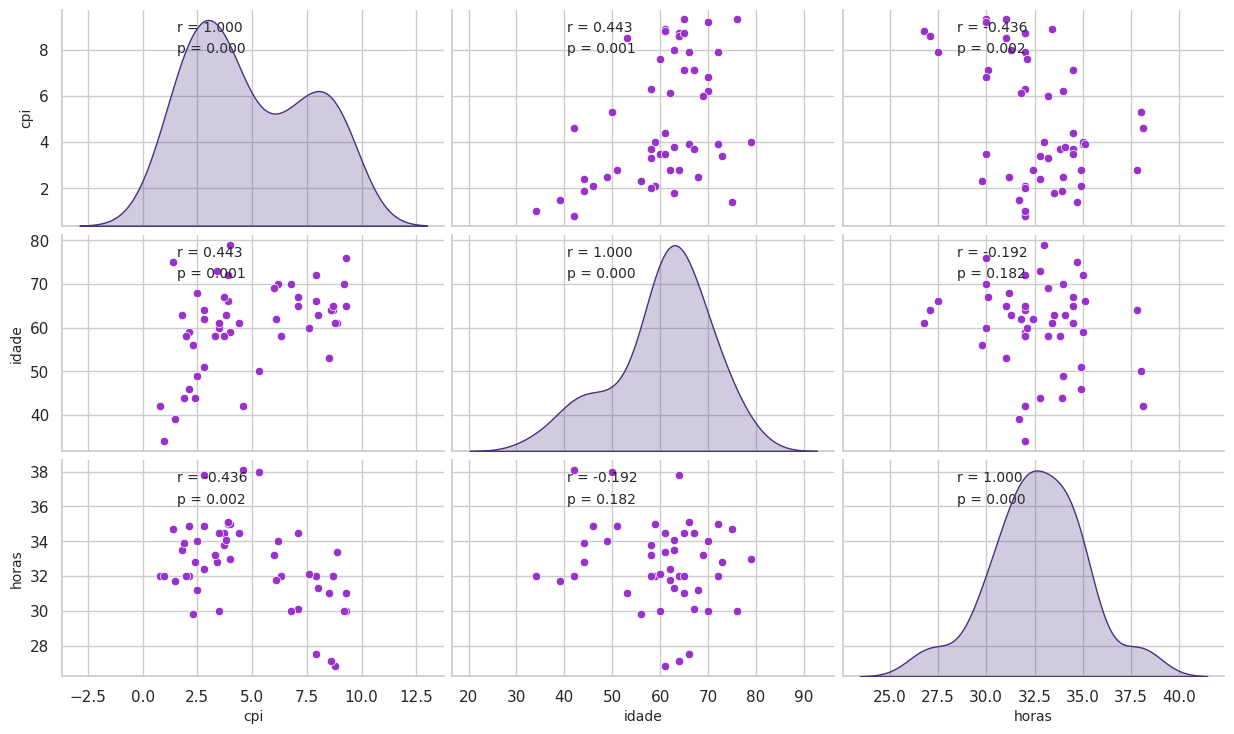

In [49]:
# Gráfico com distribuições das variáveis, scatters, valores das correlações e respectivas significâncias estatísticas.

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.3f}".format(r), xy=(.30, .9), xycoords=ax.transAxes, fontsize=10)
    ax.annotate("p = {:.3f}".format(p), xy=(.30, .8), xycoords=ax.transAxes, fontsize=10)

# Configuração do gráfico.
sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(8,4))
graph = sns.pairplot(df_paises, diag_kind="kde", plot_kws={"color": "darkorchid"}, height=2.5, aspect=1.7)
graph.map(corrfunc)

for ax in graph.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)
plt.show()

In [51]:
# Estimação de um modelo de regressão múltipla com as variáveis do dataframe 'df_paises'.

# Estimando o modelo de regressão múltipla por OLS.
modelo_paises = sm.OLS.from_formula("cpi ~ idade + horas", df_paises).fit()

# Parâmetros do 'modelo_paises'.
modelo_paises.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cpi   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     11.26
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           0.000101
Time:                        22:29:17   Log-Likelihood:                -109.93
No. Observations:                  50   AIC:                             225.9
Df Residuals:                      47   BIC:                             231.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9719      5.165      2.318      0.025       1.581      22.363
idade          0.0997      0.033      3.052      0.004       0.034       0.165
horas         -0.4013      0.135     -2.980      0.005      -0.672      -0.130
==============================================================================
Omnibus:                        3.389   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                1.762
Skew:                           0.131   Prob(JB):                        0.414
Kurtosis:                       2.119   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Cálculo do R² ajustado (slide 31 da apostila)
r2_ajust = 1-((len(df_paises.index)-1)/(len(df_paises.index)-\
                            modelo_paises.params.count()))*\
                            (1-modelo_paises.rsquared)
r2_ajust # modo direto: modelo_paises.rsquared_adj

0.295099700531963

In [55]:
# Salvando os fitted values na base de dados.
df_paises['cpifit'] = modelo_paises.fittedvalues
df_paises

,pais,cpi,idade,horas,cpifit
0,Argentina,3.9,72,35.0,5.103394
1,Australia,8.7,64,32.0,5.509820
2,Austria,7.9,72,32.0,6.307405
3,Belgium,7.1,67,30.1,6.571454
4,Brazil,4.0,59,35.0,3.807319
5,Canada,8.9,61,33.4,4.648854
6,Chile,6.2,70,34.0,5.305335
7,China,2.5,49,34.0,3.211674
8,Colombia,4.0,79,33.0,6.603955
9,Cyprus,6.3,58,32.0,4.911631


In [56]:
# In[2.8]: Gráfico 3D com scatter e fitted values (superfície espacial)
#resultantes do 'modelo_paises', gerado em HTML e aberto no browser
#(figura 'EXEMPLO2_scatter3D_fitted.html' salva na pasta do curso)

trace = go.Scatter3d(
    x=df_paises['horas'], 
    y=df_paises['idade'], 
    z=df_paises['cpi'], 
    mode='markers',
    marker={
        'size': 10,
        'color': 'darkorchid',
        'opacity': 0.7,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800,
    plot_bgcolor='white',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        ),
        yaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        ),
        zaxis=dict(
            gridcolor='rgb(200, 200, 200)',
            backgroundcolor='whitesmoke'
        )
    )
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.add_trace(go.Mesh3d(
                    x=df_paises['horas'], 
                    y=df_paises['idade'], 
                    z=df_paises['cpifit'], 
                    opacity=0.5,
                    color='orange'
                  ))
plot_figure.update_layout(scene = dict(
                        xaxis_title='horas',
                        yaxis_title='idade',
                        zaxis_title='cpi'))

plot_figure.write_html('EXEMPLO2_scatter3D_fitted.html')

# Abre o arquivo HTML no browser
import webbrowser
webbrowser.open('EXEMPLO2_scatter3D_fitted.html')

False